In [ ]:
# https://www.youtube.com/watch?v=LF79PaCjeFU&list=PLTmQbi1PYZ_EnBmO1-E0Z81ArnE-zSR1a

#### Data Preprocessing tutorial ###

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#### Load Dataset

In [2]:
dataset = pd.read_csv('EmployData.csv')

##### create depedent and indepedent variable vetor

In [3]:
x = dataset.iloc[:,:-1].values

In [4]:
print(x)

[['Mumbai' 3.0 51000.0]
 ['Newyork' 27.0 48000.0]
 ['Mumbai' 30.0 52000.0]
 ['Newyork' nan 66000.0]
 ['Tokyo' 48.0 nan]
 ['Tokyo' nan 51000.0]
 ['Singapore' 33.0 69000.0]
 ['Newyork' 105.0 79000.0]
 ['Newyork' 35.0 56000.0]
 ['Tokyo' nan 50000.0]
 ['Newyork' 105.0 79000.0]
 ['Mumbai' 2.0 76543.0]]


In [5]:
y = dataset.iloc[:,-1].values

In [6]:
print(y)

['Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes']


##### handle missing values

In [7]:
print(dataset.isnull().sum())

City                  0
Age                   3
Salary                1
Eligible for bonus    0
dtype: int64


In [8]:
# dataset.dropna(inplace=True)
# print(dataset)


In [9]:
print(dataset)

         City    Age   Salary Eligible for bonus
0      Mumbai    3.0  51000.0                Yes
1     Newyork   27.0  48000.0                Yes
2      Mumbai   30.0  52000.0                 No
3     Newyork    NaN  66000.0                 No
4       Tokyo   48.0      NaN                Yes
5       Tokyo    NaN  51000.0                 No
6   Singapore   33.0  69000.0                 No
7     Newyork  105.0  79000.0                Yes
8     Newyork   35.0  56000.0                 No
9       Tokyo    NaN  50000.0                 No
10    Newyork  105.0  79000.0                Yes
11     Mumbai    2.0  76543.0                Yes


In [10]:
# print(dataset.describe())

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
#imputer = SimpleImputer(missing_values=np.nan,strategy='median')
#imputer = SimpleImputer(missing_values=np.nan,strategy='mode')
#imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=10000)

In [13]:
imputer.fit(x[:,1:3])

SimpleImputer()

In [14]:
x[:,1:3]=imputer.transform(x[:,1:3])

In [15]:
# print(dataset.describe())

In [16]:
print(dataset.describe())
print(x[:,1:3])

              Age        Salary
count    9.000000     11.000000
mean    43.111111  61594.818182
std     38.050770  12532.728967
min      2.000000  48000.000000
25%     27.000000  51000.000000
50%     33.000000  56000.000000
75%     48.000000  72771.500000
max    105.000000  79000.000000
[[3.0 51000.0]
 [27.0 48000.0]
 [30.0 52000.0]
 [43.111111111111114 66000.0]
 [48.0 61594.818181818184]
 [43.111111111111114 51000.0]
 [33.0 69000.0]
 [105.0 79000.0]
 [35.0 56000.0]
 [43.111111111111114 50000.0]
 [105.0 79000.0]
 [2.0 76543.0]]


##### Data encoding: handle/Encode Categorical data
# One Hot Encoding

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")

In [20]:
x = np.array(ct.fit_transform(x))

In [21]:
print (x)

[[1.0 0.0 0.0 0.0 3.0 51000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [1.0 0.0 0.0 0.0 30.0 52000.0]
 [0.0 1.0 0.0 0.0 43.111111111111114 66000.0]
 [0.0 0.0 0.0 1.0 48.0 61594.818181818184]
 [0.0 0.0 0.0 1.0 43.111111111111114 51000.0]
 [0.0 0.0 1.0 0.0 33.0 69000.0]
 [0.0 1.0 0.0 0.0 105.0 79000.0]
 [0.0 1.0 0.0 0.0 35.0 56000.0]
 [0.0 0.0 0.0 1.0 43.111111111111114 50000.0]
 [0.0 1.0 0.0 0.0 105.0 79000.0]
 [1.0 0.0 0.0 0.0 2.0 76543.0]]


##### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder                

In [23]:
le = LabelEncoder()

In [24]:
y= le.fit_transform(y)

In [25]:
print(y)

[1 1 0 0 1 0 0 1 0 0 1 1]


##### split the dataset for training and testing

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 1)

In [28]:
print(x_train)

[[0.0 1.0 0.0 0.0 105.0 79000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [0.0 0.0 1.0 0.0 33.0 69000.0]
 [1.0 0.0 0.0 0.0 3.0 51000.0]
 [0.0 1.0 0.0 0.0 105.0 79000.0]
 [1.0 0.0 0.0 0.0 2.0 76543.0]
 [0.0 0.0 0.0 1.0 43.111111111111114 50000.0]
 [0.0 1.0 0.0 0.0 35.0 56000.0]
 [0.0 0.0 0.0 1.0 43.111111111111114 51000.0]]


In [29]:
print(x_test)

[[1.0 0.0 0.0 0.0 30.0 52000.0]
 [0.0 1.0 0.0 0.0 43.111111111111114 66000.0]
 [0.0 0.0 0.0 1.0 48.0 61594.818181818184]]


In [30]:
print(y_train)

[1 1 0 1 1 1 0 0 0]


In [31]:
print(y_test)

[0 0 1]


#### feature scaling - Standarisation & Normalization

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler =StandardScaler()

In [34]:
x_train[:,4:]= scaler.fit_transform(x_train[:,4:])

In [35]:
x_test[:,4:]= scaler.fit_transform(x_test[:,4:])

In [36]:
print(x_train)

[[0.0 1.0 0.0 0.0 1.7147951453420254 1.3229775236102221]
 [0.0 1.0 0.0 0.0 -0.47878163705743093 -1.1140886343570688]
 [0.0 0.0 1.0 0.0 -0.31004496148824195 0.5368271500723862]
 [1.0 0.0 0.0 0.0 -1.1537283393341866 -0.878243522295718]
 [0.0 1.0 0.0 0.0 1.7147951453420254 1.3229775236102221]
 [1.0 0.0 0.0 0.0 -1.1818511185957181 1.129820376831976]
 [0.0 0.0 0.0 1.0 -0.025692415621645717 -0.9568585596495016]
 [0.0 1.0 0.0 0.0 -0.253799402965179 -0.48516833552680017]
 [0.0 0.0 0.0 1.0 -0.025692415621645717 -0.878243522295718]]


##### outliers

In [37]:
print(x_test)

[[1.0 0.0 0.0 0.0 -1.364571677001927 -1.345606174126926]
 [0.0 1.0 0.0 0.0 0.3606368003505091 1.049642599473749]
 [0.0 0.0 0.0 1.0 1.003934876651417 0.2959635746531784]]


In [38]:
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [40]:
#define our dataset
our_dataset = [11,10,12,14,12,15,14,13,15,102,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

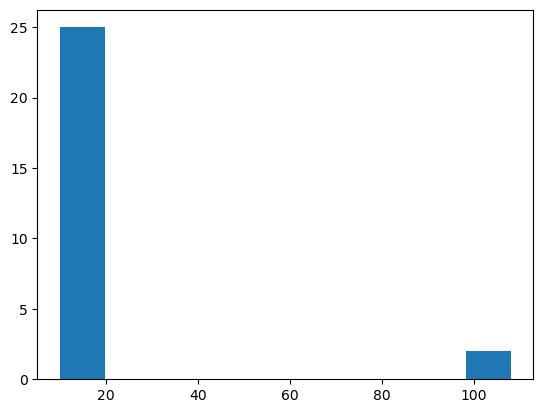

In [41]:
plt.hist(our_dataset)

##### Find and remove outliers

(array([2., 0., 0., 1., 3., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([  2.        ,   8.86666667,  15.73333333,  22.6       ,
         29.46666667,  36.33333333,  43.2       ,  50.06666667,
         56.93333333,  63.8       ,  70.66666667,  77.53333333,
         84.4       ,  91.26666667,  98.13333333, 105.        ]),
 <BarContainer object of 15 artists>)

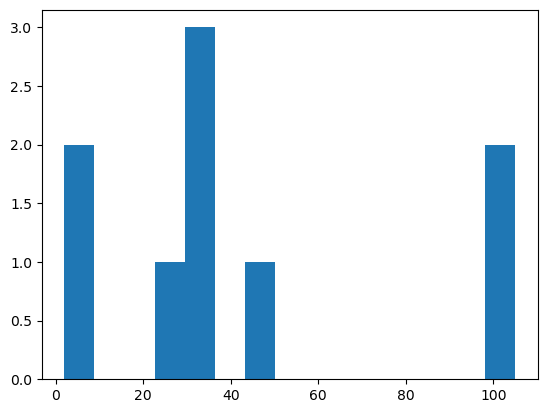

In [42]:
plt.hist(dataset['Age'],bins=15)

In [43]:
# Quantile Method

In [44]:
lowerLimit = dataset['Age'].quantile(0.05) 

In [45]:
lowerLimit

2.4

In [46]:
upperLimit = dataset['Age'].quantile(0.95)

In [47]:
upperLimit

105.0